In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raisin_df = pd.read_excel('Raisin_Dataset.xlsx')
raisin_df.head(3)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen


In [3]:
raisin_df.shape

(900, 8)

In [5]:
raisin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [6]:
raisin_df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [22]:
plt.rcParams['figure.figsize'] = (20,10)
sns.set_theme(style='whitegrid')

In [38]:
raisin_df['Class'].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

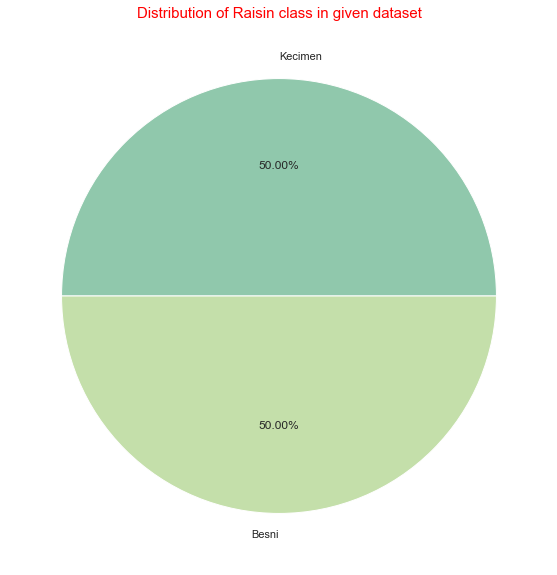

In [46]:
plt.pie(x=list(raisin_df['Class'].value_counts().values),labels=['Kecimen','Besni'],colors=['#90C8AC','#C4DFAA'],autopct='%.2f%%')
plt.title('Distribution of Raisin class in given dataset',color='Red',fontsize=15)
plt.show()

<AxesSubplot:xlabel='Area', ylabel='MajorAxisLength'>

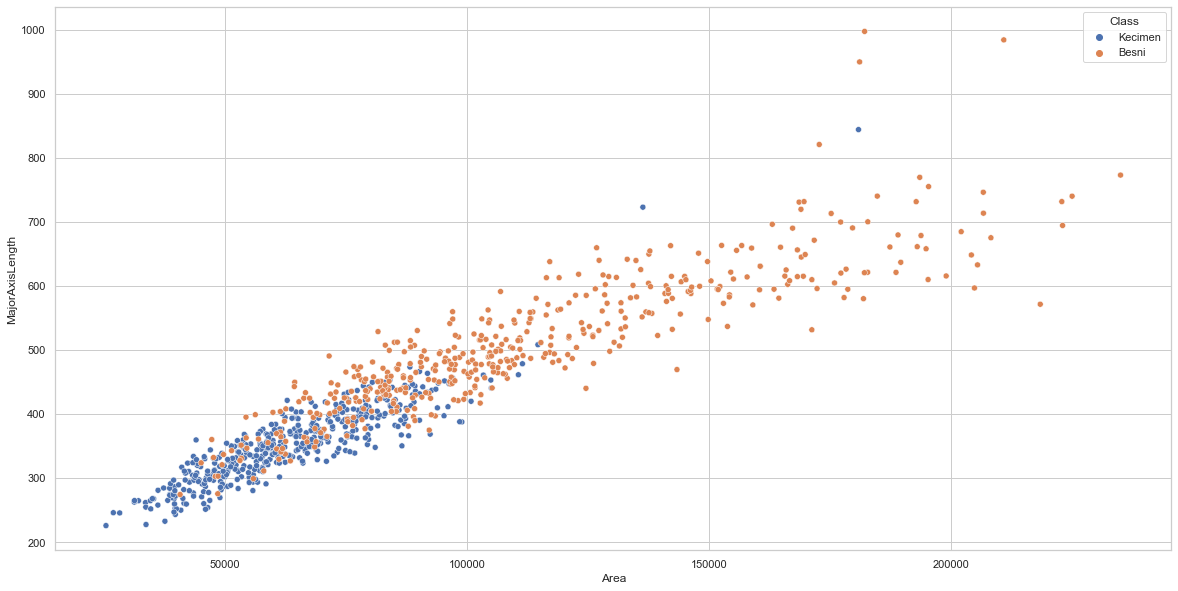

In [47]:
sns.scatterplot(x='Area',y='MajorAxisLength',hue='Class',data=raisin_df)

<AxesSubplot:xlabel='Area', ylabel='MinorAxisLength'>

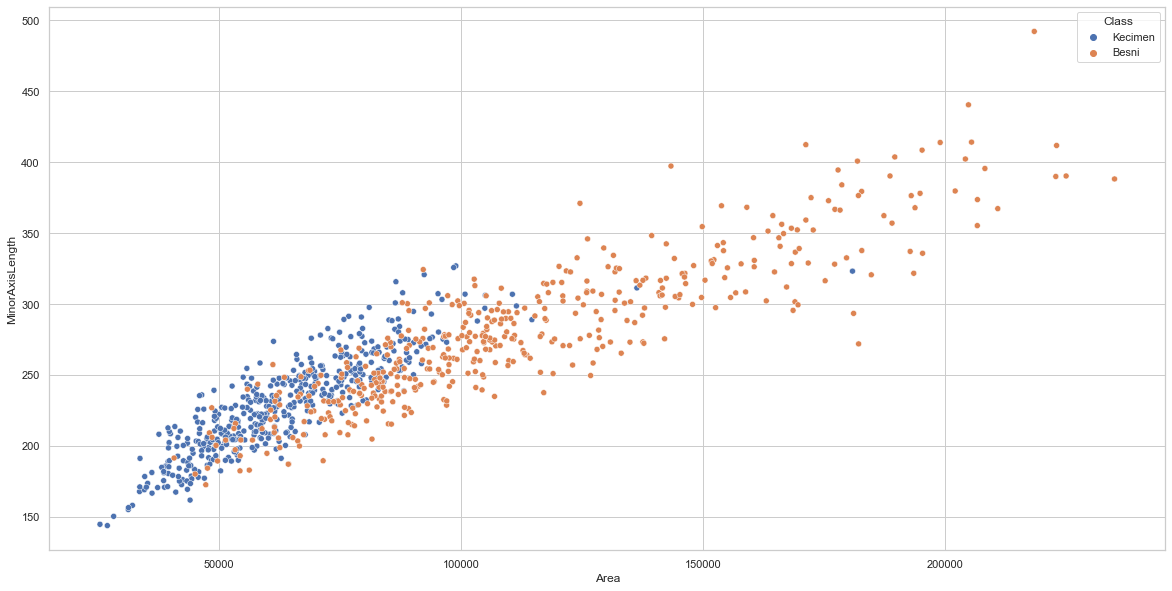

In [28]:
sns.scatterplot(x='Area',y='MinorAxisLength',hue='Class',data=raisin_df)

<AxesSubplot:xlabel='MinorAxisLength', ylabel='MajorAxisLength'>

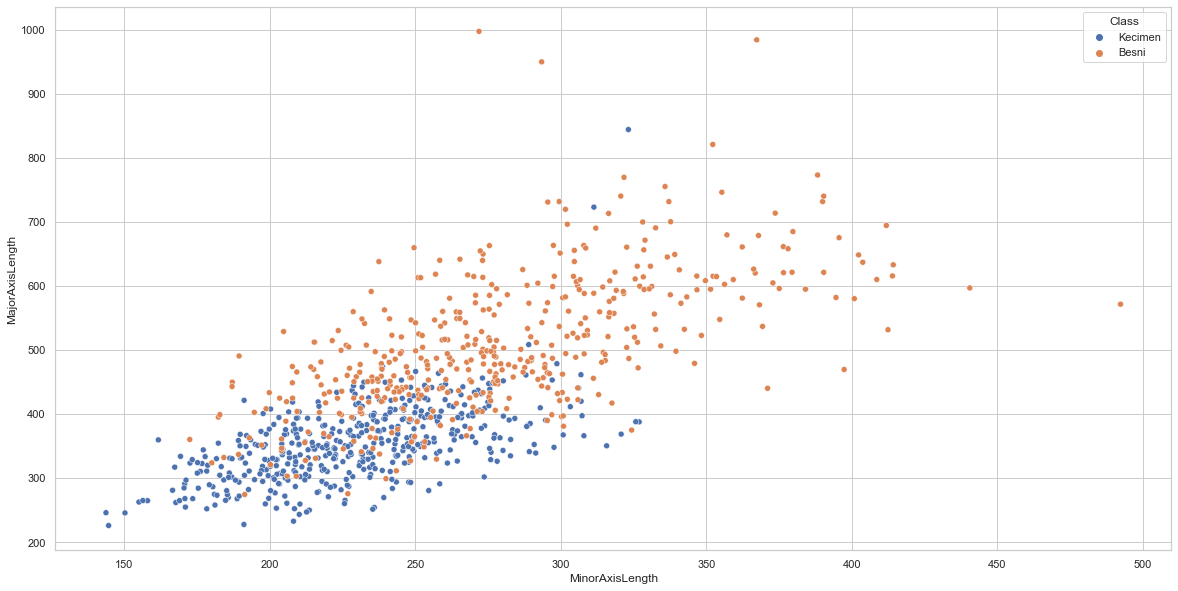

In [32]:
sns.scatterplot(x='MinorAxisLength',y='MajorAxisLength',hue='Class',data=raisin_df)

* From the above 3 scatterplot, we can observe that as the area of the raisin is increasing the majoraxislength and minoraxislength also increases.
* Similarly we can see that as the minoraxislength inreases the majoraxislength also increases.
* This is showing linear relationship pattern.

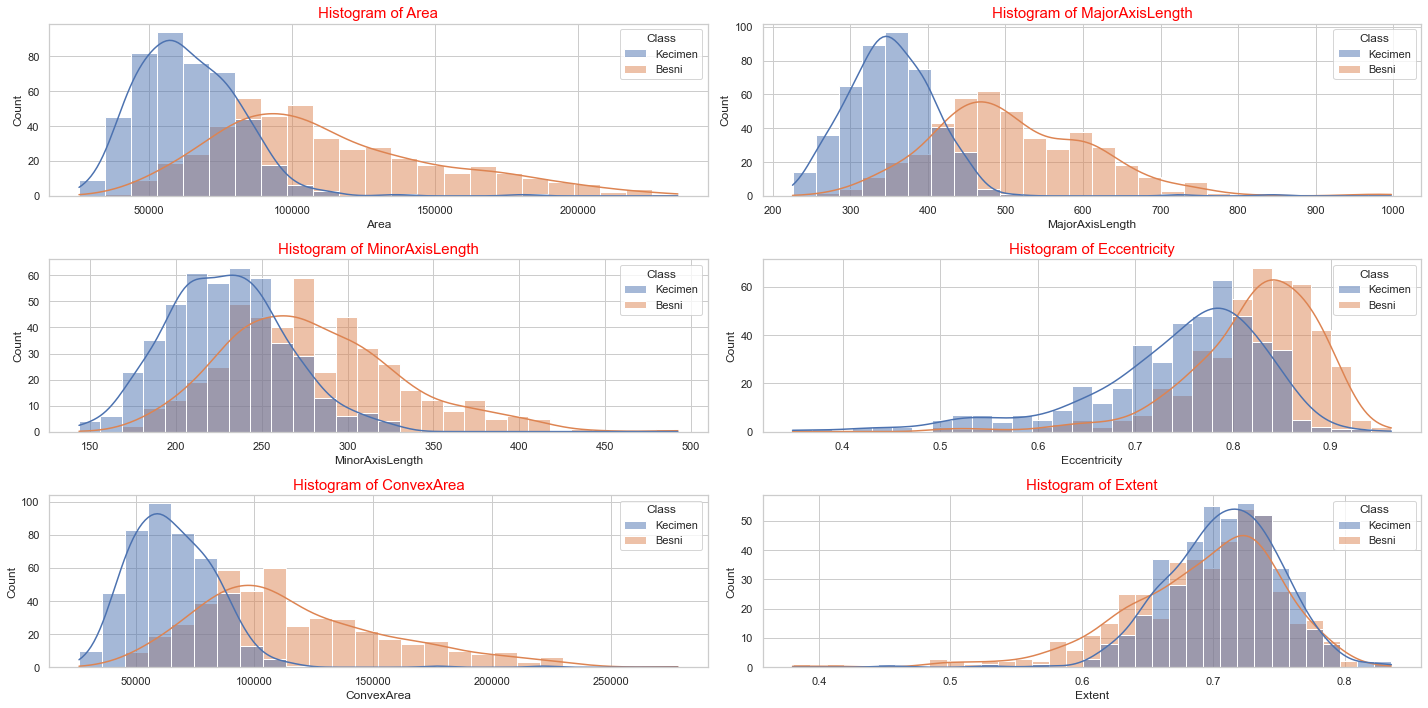

In [52]:
for i,j in enumerate(raisin_df.columns[0:6]):
    plt.subplot(3,2,i+1)
    sns.histplot(x=j,hue='Class',kde=True,data=raisin_df)
    x = 'Histogram of '+j
    plt.title(x,fontsize=15,color='Red')
    plt.tight_layout()

From the above histograms, we can observe the following points:
* Area for most of the Besni raisin lies in the range 60000 to 180000 and for Kecimen raisin lies in range of 50000 to 80000.
* MajorAxisLength for most of the Besni raisin lies in the range of 400 to 700.Most of Kecimen raisin lies in the range of 250 upto 450.

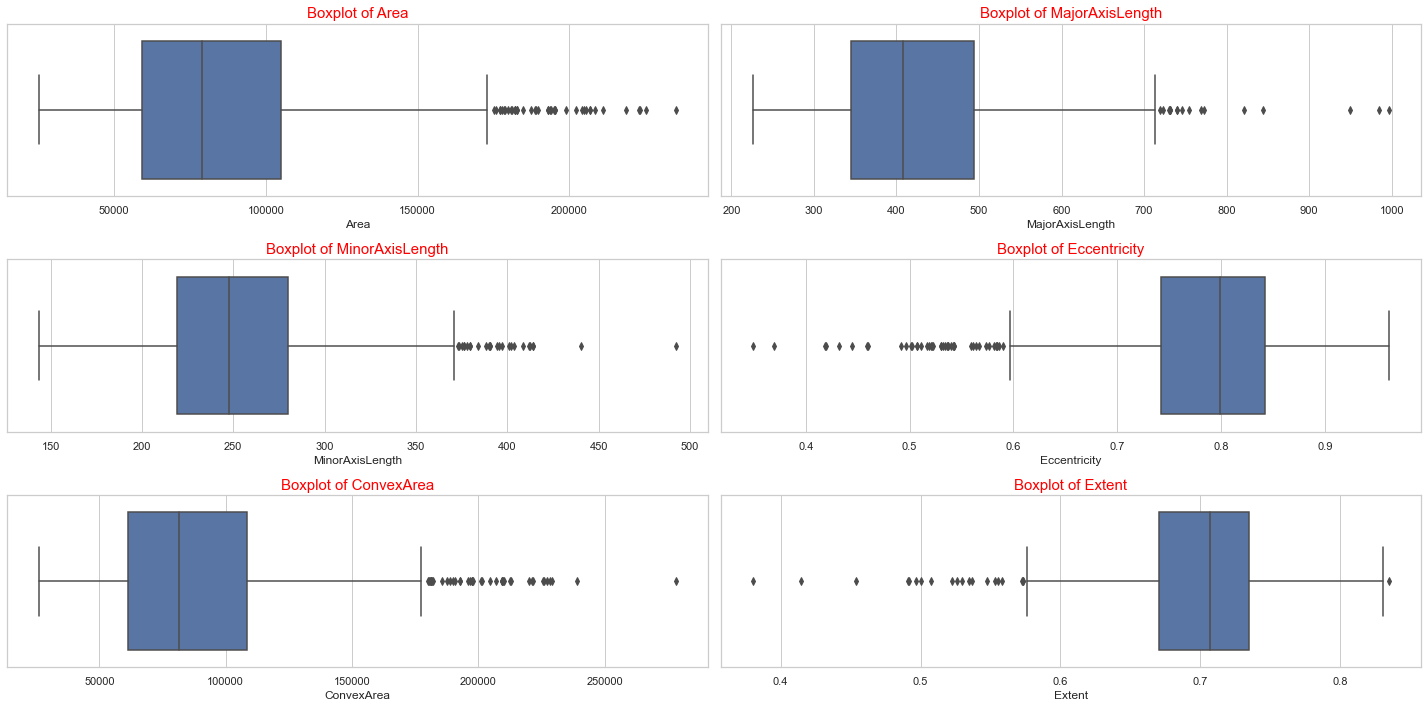

In [24]:
for i,j in enumerate(raisin_df.columns[0:6]):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=j,data=raisin_df)
    x = 'Boxplot of '+j
    plt.title(x,fontsize=15,color='Red')
    plt.tight_layout()

### Model Selection

In [53]:
import category_encoders as ce

In [54]:
encoder = ce.OrdinalEncoder(cols=['Class'])

In [56]:
raisin_df = encoder.fit_transform(raisin_df)

In [58]:
raisin_df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [73]:
x = raisin_df[['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity','ConvexArea', 'Extent', 'Perimeter']]
y = raisin_df['Class']

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [76]:
from sklearn.neighbors import KNeighborsClassifier

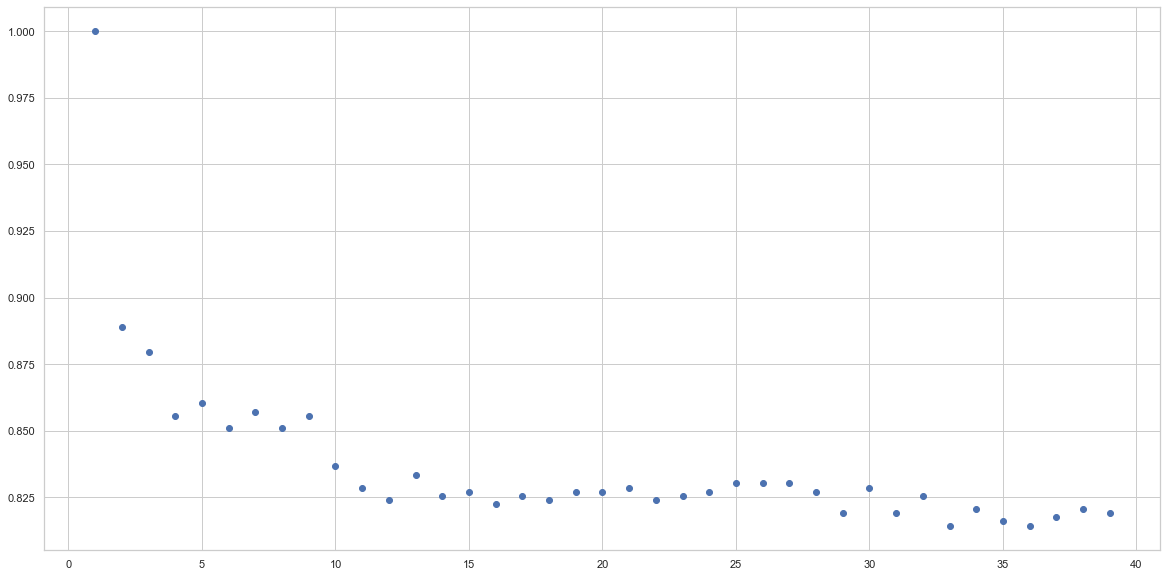

In [77]:
k_range = range(1,40)
score = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    score.append(knn.score(x_train,y_train))
    
plt.scatter(k_range,score)

In [78]:
kn = KNeighborsClassifier(n_neighbors=2)

In [79]:
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [86]:
print('Training accuracy is ',kn.score(x_train,y_train))
print('Testing accuracy is ',kn.score(x_test,y_test))

Training accuracy is  0.8888888888888888
Testing accuracy is  0.825925925925926


In [89]:
y_pred = knn.predict(x_test)

In [90]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[126,  12],
       [ 32, 100]], dtype=int64)